# Salary Predction 

## Define the problem 
### As a Data scientist, how would you examine a set of job postings and then predict salaries for a new set of job postings?

### You must build a model to predict the salaries for the job postings contained in test_features.csv. The output of your system should be a CSV file entitled test_salaries.csv where each row has the following format: jobId, salary


In [1]:
from IPython.display import Image

In [2]:
Image(url = "https://insights.dice.com/wp-content/uploads/2019/01/Salary-Increase-Pay-Raise-Better-Pay-Dice.png")

## 1. Explore Data Analysis

## 1.1 Load the Data

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Read in files and print in info
train_feature = pd.read_csv('C:/DSDJ/portfolio/Salary prediction/DSDJ-data-SalaryPredictions/data/train_features.csv')
target_feature = pd.read_csv('C:/DSDJ/portfolio/Salary prediction/DSDJ-data-SalaryPredictions/data/train_salaries.csv')
test_feature = pd.read_csv('C:/DSDJ/portfolio/Salary prediction/DSDJ-data-SalaryPredictions/data/test_features.csv')


## 1.2 Examine the data

In [5]:
train_feature.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [6]:
test_feature.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [7]:
target_feature.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [8]:
train_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 38.1+ MB


In [9]:
test_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 38.1+ MB


In [10]:
target_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.4+ MB


In [11]:
train_feature.duplicated().sum()

0

In [12]:
test_feature.duplicated().sum()

0

In [13]:
target_feature.duplicated().sum()

0

### 1.2.1 Identify numerical and categorical variables

In [14]:
train_feature.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [15]:
numerical_cols = ['yearsExperience','milesFromMetropolis']

In [16]:
categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

### 1.2.2 Summarize numerical and categorical variables

In [17]:
train_feature.describe(include = [np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [18]:
train_feature.describe(include = ['O']) # include categorical columns

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684460902,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


## 1.3 Merge features and targets into single dataframe

In [19]:
#Merge the features and salaries on jobId,delete original file to save memory
train = pd.merge(train_feature,target_feature, on='jobId')

In [20]:
#del train_feature
#del target_feature

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 53.4+ MB


In [22]:
train.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


## 1.4 Visualize target variable (salary)

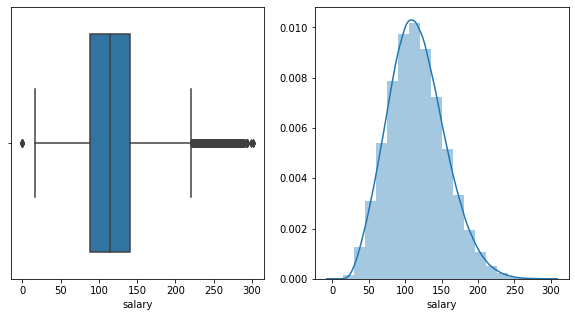

In [23]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.boxplot(train.salary)
plt.subplot(1,2,2)
sns.distplot(train.salary,bins = 20)
plt.show()

## 1.5 Examine potential outliers

### 1.5.1 USE IQR rule to identify potential outliers

In [24]:
stat = train.salary.describe()
print(stat)
IQR = stat['75%']- stat['25%']
Upper = stat['75%']+ 1.5 * IQR
Lower = stat['25%']- 1.5 * IQR
print('The Upper and Lower bounds for suspected outliers are {} and {}'.format(Upper,Lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The Upper and Lower bounds for suspected outliers are 220.5 and 8.5


### 1.5.2 Identify potential outliers

In [25]:
train[train.salary <8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [26]:
train.loc[train.salary>222.5,'jobType'].value_counts()

CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

In [27]:
train[(train.salary >222.5) & (train.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


The observations with zero salaries don't seem to be a intern or volunteer positions. I am confident that these entries are missing or corrupt data and are supposed to be removed from training set.

The high-salary potential outliers all appear to be plausible. Most roles are senior executive roles and the junior roles are coming from industries that are famous for high salaries (oil,finance). I determine that thest entries to be legitimate and won't remove them. 

In [28]:
# Remove the data with zero salaries
train = train[train.salary>8.5]

In [29]:
def feature_plot (df,col):
    '''Make plot for each features
    left, the distribution of samples on the feature
    right,the dependance of salary on the feature'''
    plt.figure(figsize = (14,6))
    plt.subplot(1,2,1)
    if df[col].dtype =='int64':
        df[col].value_counts().sort_index().plot()
    else: 
        #change the categorical data to category type and order their level by the mean salary
        mean= df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels,inplace = True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)
    if df[col].dtype =='int64' or col =='companyId':
        #plot the mean salary for each category and fill between the (mean-std, mean+std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)),mean.values-std.values,mean.values+ std.values, 
                        alpha = 0.1)
    else:
        sns.boxplot( x= col, y = 'salary',data = df)
        plt.xticks(rotation=45)
        plt.ylabel('Salaries')
        plt.show()

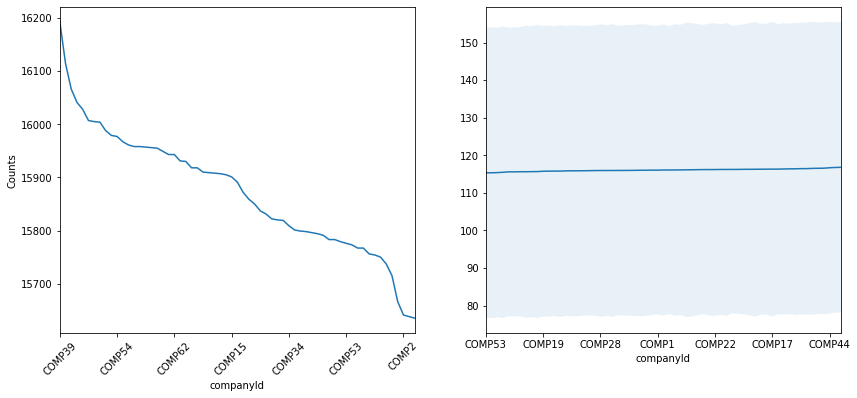

In [30]:
feature_plot(train,'companyId')

##### The salary doesn't show the strong asscoiation with companies.

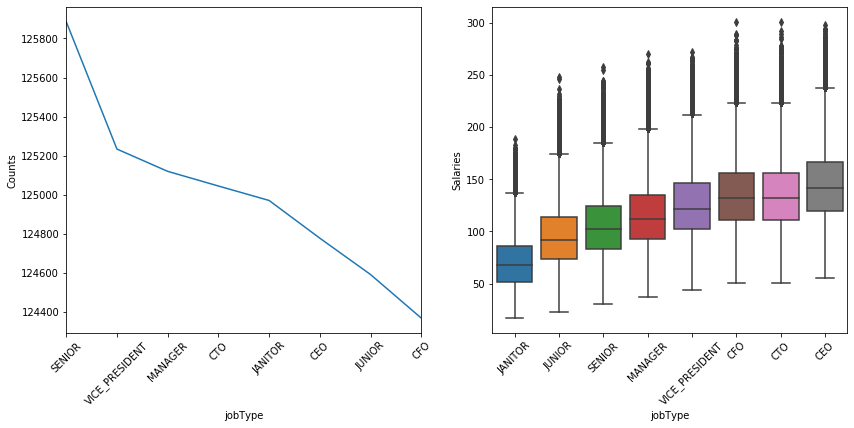

In [31]:
feature_plot(train,'jobType')

##### We can see a clear positive correlation between job types and salary. 

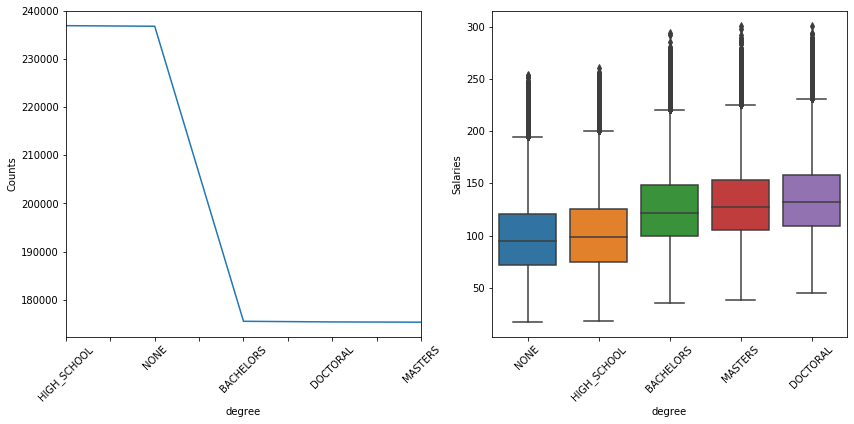

In [32]:
feature_plot(train,'degree')

##### More advanced degrees seem to correspond to greater compensations. 

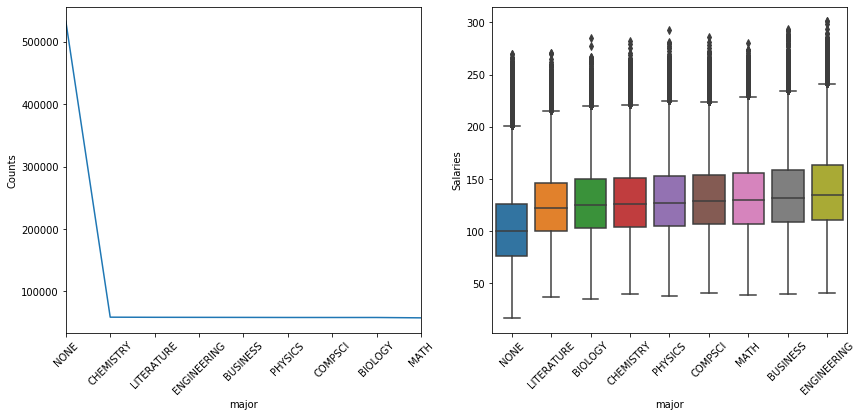

In [33]:
feature_plot(train, 'major')

##### People who major in Engineering,Business and math generally have higher salaries.

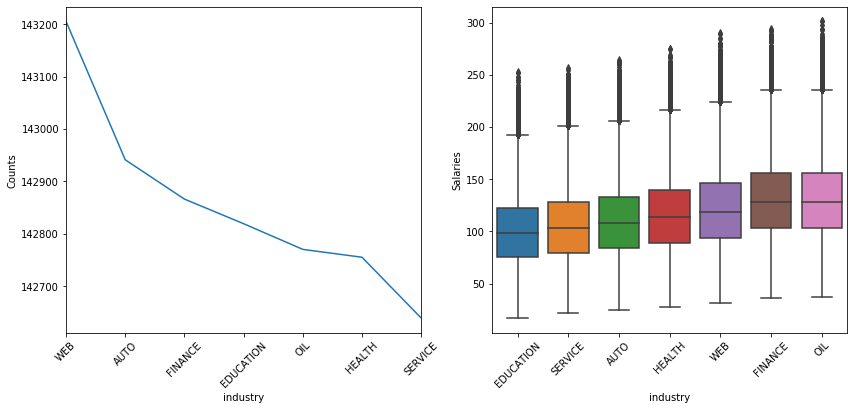

In [34]:
feature_plot(train,'industry')

##### Regarding industries, oil ,finance and web industries offer better generally.

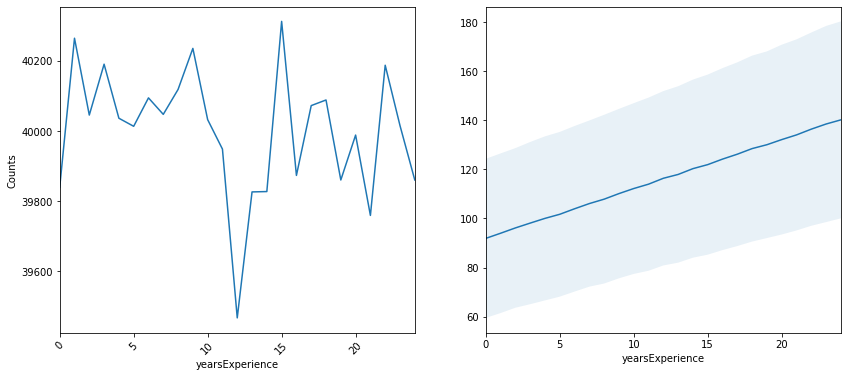

In [35]:
feature_plot(train,'yearsExperience')

##### Generally speaking, it seems that salary and years of experience have a positive correlation.

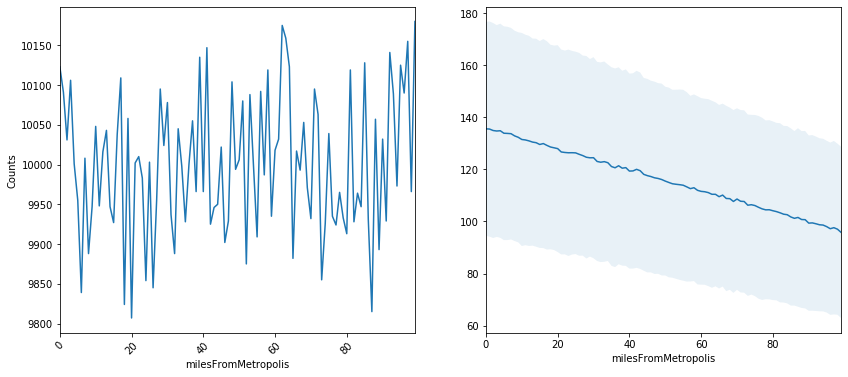

In [36]:
feature_plot(train,'milesFromMetropolis')

##### The graph indicates that there's a negative correlation between salaries and distances to metropolis. 

In [37]:
def label_encode(df,col):
    # encode the categories using average salary for each category to replace labels 
    cat_dict = {}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train[train[col] == cat]['salary'].mean()
    df[col] = df[col].map(cat_dict)

In [38]:
for col in train.columns:
    if train[col].dtype.name =="category":
        label_encode(train,col)

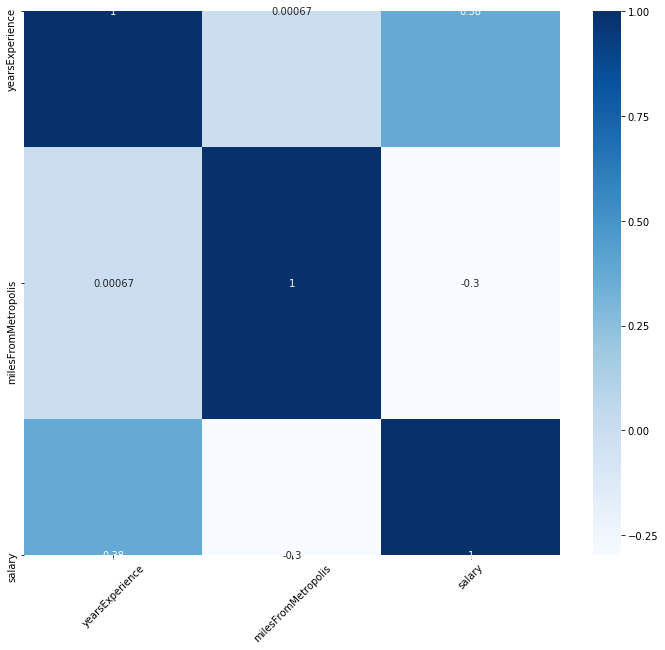

In [39]:
#Correlations between selected features and response
#jobId is discarded because it is unique for indiviuals
fig = plt.figure(figsize=(12,10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry','yearsExperience', 'milesFromMetropolis']
sns.heatmap(train[features + ['salary']].corr(), cmap = 'Blues',annot =True)
plt.xticks(rotation = 45)
plt.show()

As indicated, jobType is most strongly correlated with salary ,followed by degree,major, and yearsExperience. Among the features, we see that degree and major have a strong correlation and jobType has a moderate degree of correlation with both degree and major. 

# 2. Develop 

### Utilizing MSE and RMSE to estimate the robustness of models 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from math import sqrt

In [41]:
def one_hot_encode_feature_df (df,cat_vars=None, num_vars=None):
    '''performs one-hot encoding on all categorical variables and combines result with continous variables'''
    cat_df = pd.get_dummies(df[cat_vars])
    num_df = df[num_vars].apply(pd.to_numeric)
    return pd.concat([cat_df,num_df],axis = 1)#ignore_Index = False
def get_target_df(df,target):
    '''return target dataframe'''
    return df[target]
def train_model(model,feature_df,target_df,num_procs,mean_mse,cv_std):
    neg_mse = cross_val_score(model, feature_df,target_df,cv=5, n_jobs = num_procs, scoring = 'neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)
def get_summary(model,mean_mse,cv_std):
    print('\nModel:\n',model)
    print('Average MSE:\n',mean_mse[model])
    print('Standard Deviation during CV:\n',cv_std[model])

def save_outcomes(model,mean_mse,predictions,feature_importances):
    '''save model,model summary,feature importance,and predictions'''
    with open ('model.txt','w') as file:
        file.write(str(model))
    feature_importance.to_csv('feature_importance.csv')
    np.savetxt('prediction.csv',predictions,delimiter = ',')


    
   

In [42]:
#define imputs
raw_train_df = train
test_feature_file = test_feature
    
#define variables
categorical_vars = ['companyId', 'jobType', 'degree', 'major', 'industry']
numeric_vars = ['yearsExperience', 'milesFromMetropolis']
target_var = 'salary'
    
#clean ,shuffle,and index training data --- shuffling may improve cross-validatation accuracy
clean_train = shuffle(raw_train_df).reset_index() #encode categorical data and get final feature dfs
print("ENCODING DATA")
feature_df = one_hot_encode_feature_df(clean_train,cat_vars = categorical_vars, num_vars = numeric_vars)
test_df = one_hot_encode_feature_df(test_feature_file,cat_vars =categorical_vars, num_vars = numeric_vars)
    
# get target df
target_df =get_target_df(clean_train,target_var)
    
#initialise model list and dicts
models = []
mean_mse = []
cv_std = []
res = []

    
#define number of processes to run in parallel
num_procs =2
#shared model parameters 
verbose_lvl = 5 
#create models ---hyperparameters tuning already done by hand for each model
lr = LinearRegression()
lr_std_pca = make_pipeline(StandardScaler(),PCA(),LinearRegression())
rf = RandomForestRegressor(n_estimators=60,n_jobs = num_procs,max_depth=25,min_samples_split=60,\
                               max_features = 30, verbose = verbose_lvl)
gbm = GradientBoostingRegressor(n_estimators = 40, max_depth = 5, loss = 'ls',verbose=verbose_lvl)
    
models.extend([lr,lr_std_pca,rf,gbm])
    
# parallel cross-validation models, using MSE as evaluation metric,and print summaries
print("Beginning cross validation")
for model in models:
    train_model(model,feature_df,target_df,num_procs,mean_mse,cv_std)
    print_summary(model,mean_mse,cv_std)
# choose model with lowest mse
model = min(mean_mse, key = mean_mse.get)
print('\nPredictions calculated using model with lowest MSE:')
print(model)
   

ENCODING DATA
Beginning cross validation


MemoryError: 

In [ ]:
 #train model on entire dataset
    model.fit(feature_df,target_df)
    
    #Create predictions based on test data
    predictions = model.predict(test_df)
    
    #Store feature importances
    if hasattr(model,'feature_importances_'):
        importances = model.feature_importances_
    else:
        #linear models don't have feature_importances_
        importances = [0]*len(feature_df.columns)
    feature_importances = pd.DataFrame({'feature':feature_df.columns,'importance':importances})
    feature_importances.sort_values(by = 'importance',ascending =False, inplace= True)
    # set index to 'feature'
    feature_importances.set_index('feature',inplace =True,drop=True)
    
    #creat plot 
    feature_importances[0:25].plot.bar(figsize=(20,10))
    plt.show()
    
    #save outcomes
    save_outcomes(model,mean_mse[model],predictions,feature_importances)